In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
central = pd.read_csv('1_clients/client_1/Rlimma_voom.tsv', index_col=0, sep='\t').sort_index().dropna()
federated_5 = pd.read_csv('5_clients/flimma/client_1/results.csv', index_col=0).drop('GENE', axis=1).sort_index().dropna()
common_genes = list(set(central.index.to_list()).intersection(federated_5.index.to_list()))
central = central.loc[common_genes, ['logFC', 'adj.P.Val']]
federated_5 = federated_5.loc[common_genes, ['logFC', 'adj.P.Val']]
federated_5['log.adj.P.Val'] = federated_5['adj.P.Val'].apply(np.log10)
central['log.adj.P.Val'] = central['adj.P.Val'].apply(np.log10)
federated_5.index.name = None

In [36]:
federated_5

,logFC,adj.P.Val,log.adj.P.Val
ZNF862,0.135269,4.856085e-01,-0.313714
ICMT,-0.040056,7.142531e-01,-0.146148
UBTF,0.342124,2.493505e-06,-5.603190
LIPC,-0.055897,8.863082e-01,-0.052415
ZIC1,-5.591137,2.195658e-17,-16.658435
...,...,...,...
C8orf41,0.094964,5.132341e-01,-0.289685
RTKN2,-1.110438,1.571022e-06,-5.803818
LOC100133957,-0.002940,9.905169e-01,-0.004138
MSX2P1,1.342528,1.317468e-05,-4.880260


In [37]:
central

,logFC,adj.P.Val,log.adj.P.Val
ZNF862,0.135519,4.847931e-01,-0.314444
ICMT,-0.039911,7.151408e-01,-0.145608
UBTF,0.342248,2.448948e-06,-5.611020
LIPC,-0.057728,8.827889e-01,-0.054143
ZIC1,-5.593448,2.038076e-17,-16.690780
...,...,...,...
C8orf41,0.095404,5.111737e-01,-0.291432
RTKN2,-1.110157,1.582629e-06,-5.800621
LOC100133957,-0.002406,9.922167e-01,-0.003393
MSX2P1,1.342058,1.372486e-05,-4.862492


In [38]:
log_p_diff = (federated_5 - central).abs()
display(log_p_diff)

,logFC,adj.P.Val,log.adj.P.Val
ZNF862,0.000250,8.153971e-04,0.000730
ICMT,0.000145,8.876937e-04,0.000539
UBTF,0.000125,4.455712e-08,0.007831
LIPC,0.001831,3.519361e-03,0.001728
ZIC1,0.002311,1.575815e-18,0.032344
...,...,...,...
C8orf41,0.000440,2.060387e-03,0.001747
RTKN2,0.000281,1.160628e-08,0.003197
LOC100133957,0.000534,1.699743e-03,0.000745
MSX2P1,0.000470,5.501753e-07,0.017768


0.9999975911281874
0.9999989865324241


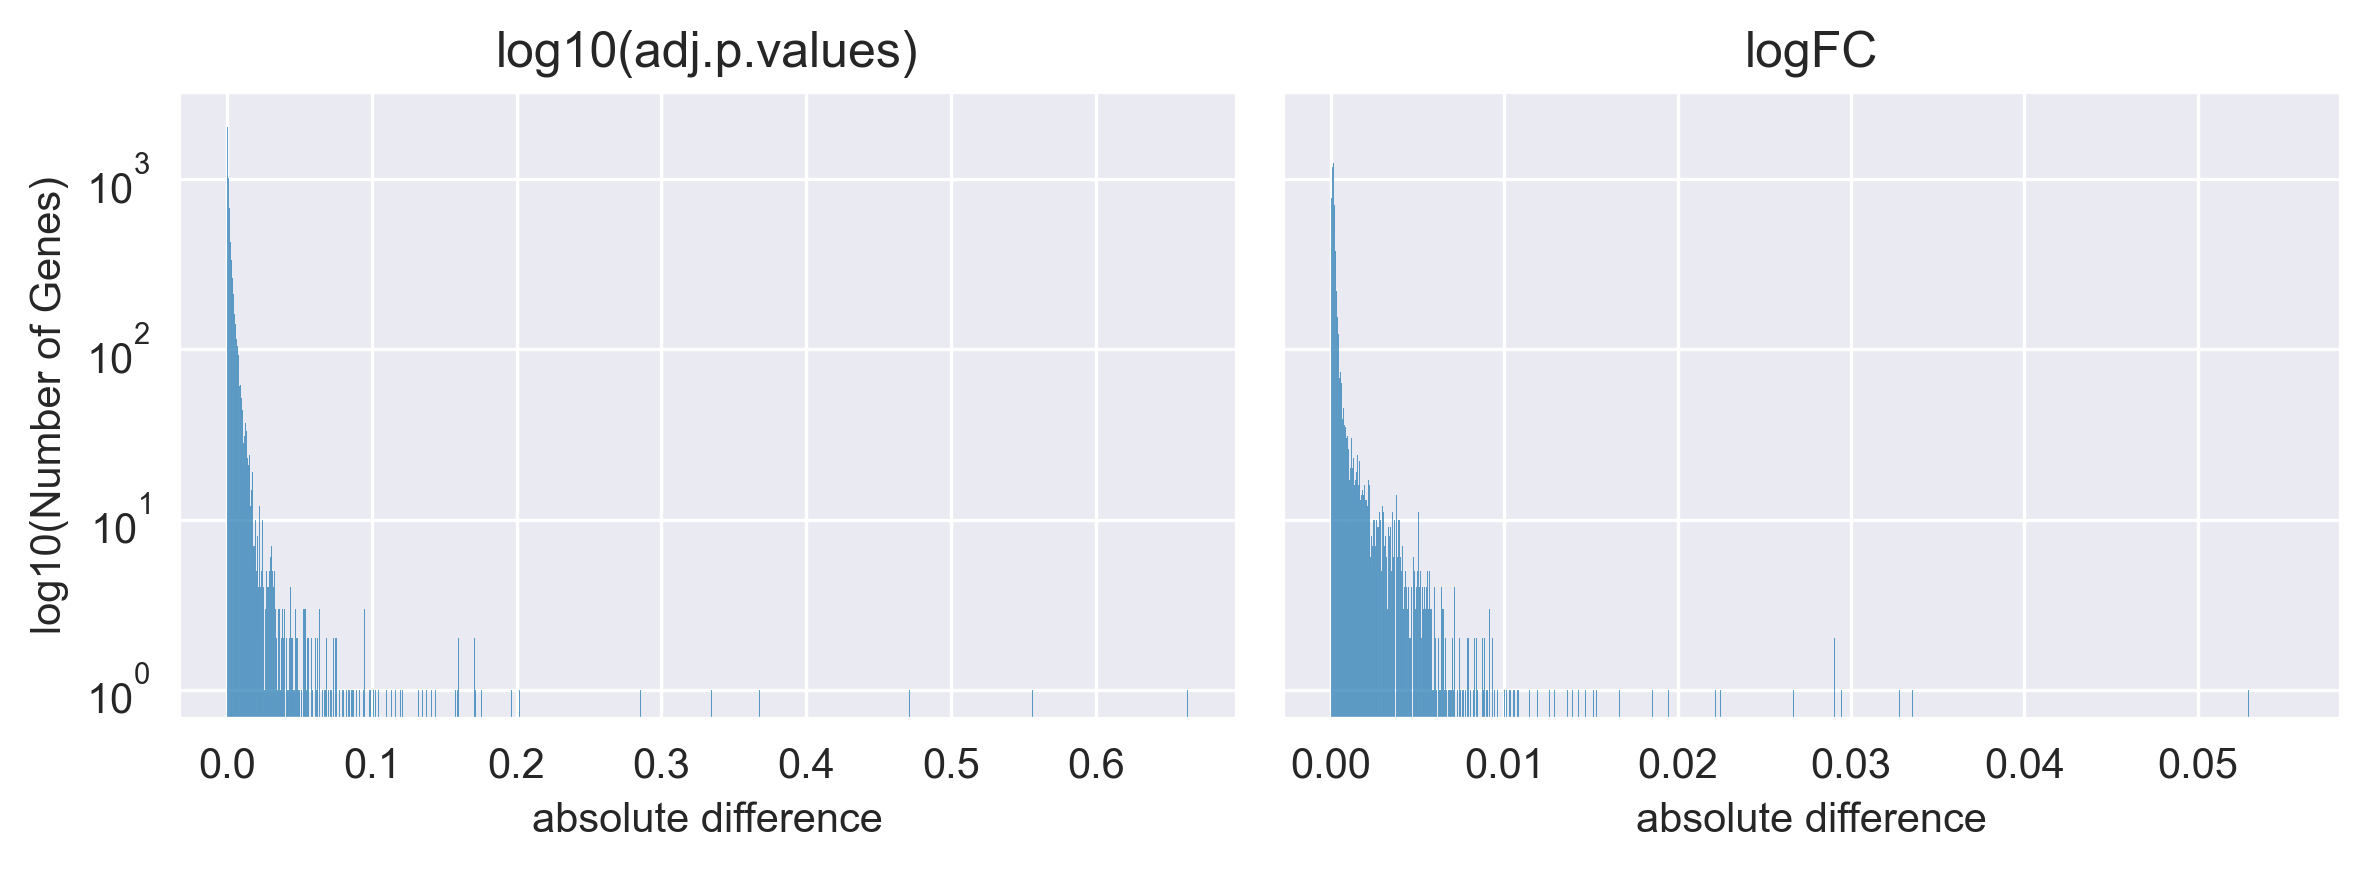

In [39]:
spearman_p, _ = stats.spearmanr(central['log.adj.P.Val'], federated_5['log.adj.P.Val'])
spearman_logfc, _ = stats.spearmanr(central['logFC'], federated_5['logFC'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), dpi=300, sharey='row')
sns.histplot(data=log_p_diff, x='log.adj.P.Val', log=10, ax=ax1)
sns.histplot(data=log_p_diff, x='logFC', log=10, ax=ax2)
ax1.set_ylabel('log10(Number of Genes)')
ax2.set_ylabel('log10(Number of Genes(')
ax1.set_xlabel('absolute difference')
ax2.set_xlabel('absolute difference')
ax1.set_title(f'log10(adj.p.values)')
ax2.set_title(f'logFC')
plt.tight_layout()
fig.savefig('flimma_results.png', dpi=300)
fig.savefig('flimma_results.pdf', dpi=300)
fig.savefig('flimma_results.svg', dpi=300)
print(spearman_p)
print(spearman_logfc)